In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
IPLdf = pd.read_csv('deliveries.csv.zip')

In [3]:
IPLdf.fillna(0,inplace=True) #filling all the NaN values with 0

In [4]:
IPLdf.head(6)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Replacing the Team Names with their abbreviations to make it easy to plot and understand
IPLdf.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore',
               'Deccan Chargers','Chennai Super Kings','Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
               'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [6]:
#Total Number of Balls played by an Individual Batsman
NBalls = IPLdf.groupby(['batsman'])['ball'].count().reset_index()
NBalls = NBalls.sort_values(by= 'ball',ascending= False)
NBalls.head(8)

,batsman,ball
431,V Kohli,3494
137,G Gambhir,3433
374,SK Raina,3369
323,RG Sharma,3274
347,S Dhawan,3005
340,RV Uthappa,2960
103,DA Warner,2902
259,MS Dhoni,2680


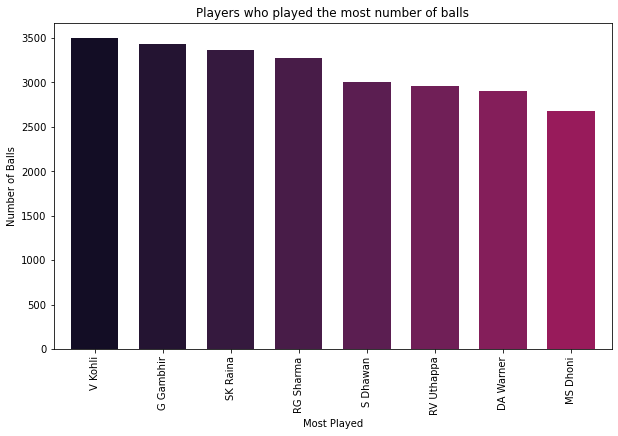

In [7]:
#Total Number of Balls played by an Individual Batsman
plt.subplots(figsize=(10,6))
max_balls=IPLdf.groupby(['batsman'])['ball'].count()
Max= max_balls.sort_values(ascending=False)[:8].plot.bar(width=0.7,color=sns.color_palette('rocket',20))
plt.xlabel('Most Played')
plt.ylabel('Number of Balls')
plt.title('Players who played the most number of balls')
plt.show()

In [8]:
#Total Number of Runs Scored by an Individual Batsman
NRuns=IPLdf.groupby(['batsman'])['batsman_runs'].sum().reset_index()
NRuns = NRuns.sort_values(by= 'batsman_runs',ascending= False)
NRuns.head(8)

,batsman,batsman_runs
374,SK Raina,4548
431,V Kohli,4423
323,RG Sharma,4207
137,G Gambhir,4132
103,DA Warner,4014
340,RV Uthappa,3778
85,CH Gayle,3651
347,S Dhawan,3561


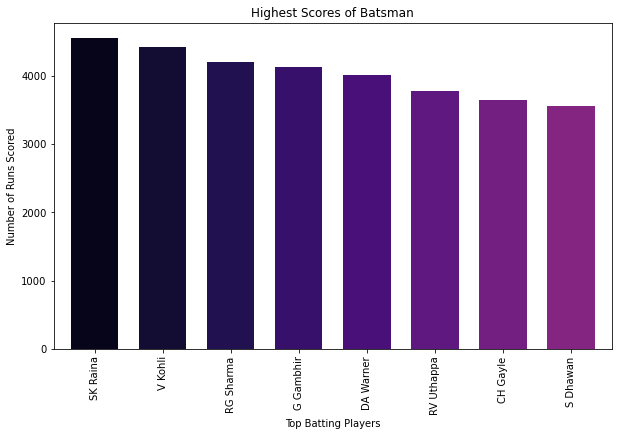

In [9]:
#Plotting Total Number of Runs Scored by an Individual Batsman
plt.subplots(figsize=(10,6))
max_runs=IPLdf.groupby(['batsman'])['batsman_runs'].sum()
Max= max_runs.sort_values(ascending=False)[:8].plot.bar(width=0.7,color=sns.color_palette('magma',20))
plt.xlabel('Top Batting Players')
plt.ylabel('Number of Runs Scored')
plt.title('Highest Scores of Batsman')
plt.show()

In [10]:
#Players who scored the most one runs in the field
N_1s=IPLdf.groupby('batsman')['batsman_runs'].agg(lambda x: (x==1).sum()).reset_index()
N_1s = N_1s.sort_values(by= 'batsman_runs',ascending= False)
N_1s.head(8)

,batsman,batsman_runs
431,V Kohli,1410
323,RG Sharma,1379
374,SK Raina,1377
137,G Gambhir,1313
347,S Dhawan,1137
340,RV Uthappa,1087
259,MS Dhoni,1085
38,AM Rahane,1039


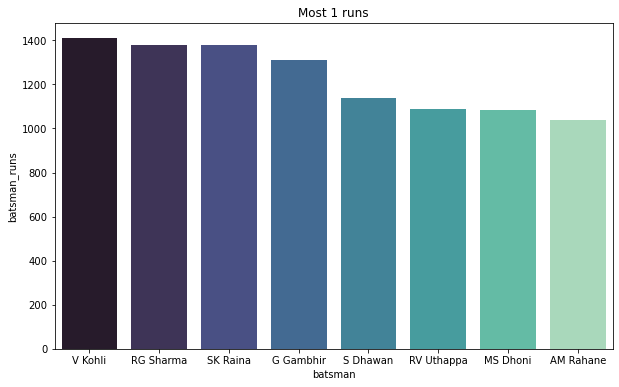

In [11]:
A = N_1s.head(8)
plt.subplots(figsize=(10,6))
ax = sns.barplot(x = A.batsman, y= A.batsman_runs, data= A, palette="mako").set(title='Most 1 runs')

In [12]:
#Players who scored the most two runs in the field
N_2s=IPLdf.groupby('batsman')['batsman_runs'].agg(lambda x: (x==2).sum()).reset_index()
N_2s = N_2s.sort_values(by= 'batsman_runs',ascending= False)
N_2s.head(8)

,batsman,batsman_runs
259,MS Dhoni,251
137,G Gambhir,245
374,SK Raina,242
431,V Kohli,242
103,DA Warner,207
340,RV Uthappa,191
22,AB de Villiers,187
323,RG Sharma,177


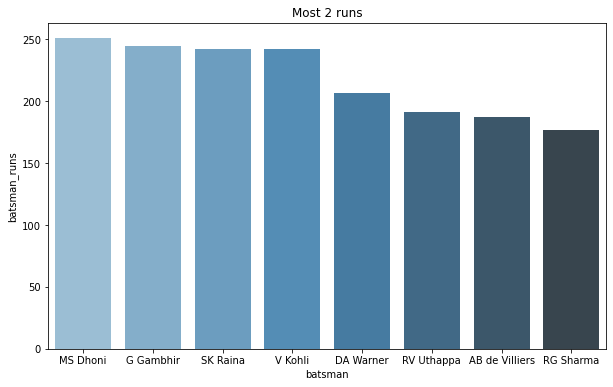

In [13]:
A = N_2s.head(8)
plt.subplots(figsize=(10,6))
ax = sns.barplot(x = A.batsman, y= A.batsman_runs, data= A, palette="Blues_d").set(title='Most 2 runs')

In [14]:
#Players who scored the most fours in the field
NFours=IPLdf.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
NFours = NFours.sort_values(by= 'batsman_runs',ascending= False)
NFours.head(8)

,batsman,batsman_runs
137,G Gambhir,484
374,SK Raina,402
347,S Dhawan,401
103,DA Warner,401
431,V Kohli,384
340,RV Uthappa,377
323,RG Sharma,354
433,V Sehwag,334


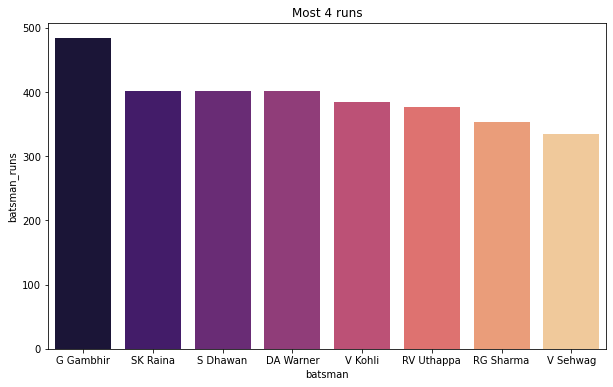

In [15]:
A = NFours.head(8)
plt.subplots(figsize=(10,6))
ax = sns.barplot(x = A.batsman, y= A.batsman_runs, data= A, palette="magma").set(title='Most 4 runs')

In [16]:
#Players who scored the most sixes in the field
NSixes=IPLdf.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
NSixes = NSixes.sort_values(by= 'batsman_runs',ascending= False)
NSixes.head(8)

,batsman,batsman_runs
85,CH Gayle,266
374,SK Raina,174
323,RG Sharma,173
103,DA Warner,160
431,V Kohli,160
22,AB de Villiers,158
259,MS Dhoni,156
454,YK Pathan,149


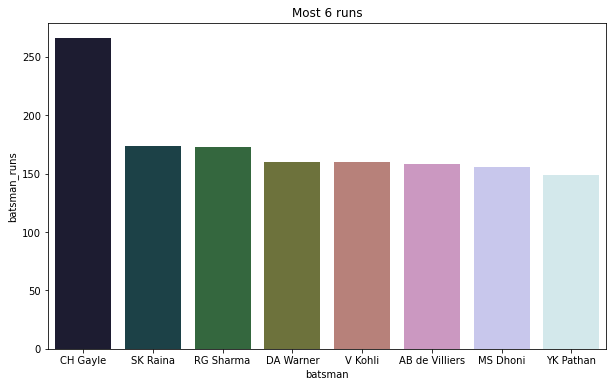

In [17]:
A = NSixes.head(8)
plt.subplots(figsize=(10,6))
ax = sns.barplot(x = A.batsman, y= A.batsman_runs, data= A, palette="cubehelix").set(title='Most 6 runs')

In [18]:
#Teams with maximum Boundaries
MaxB=IPLdf[IPLdf['batsman_runs']==6].batting_team.value_counts().reset_index()
MaxB2=IPLdf[IPLdf['batsman_runs']==4].batting_team.value_counts().reset_index()
MaxB=MaxB.merge(MaxB2,left_on='index',right_on='index')
MaxB.columns = ["Teams","6's", "4's"]
MaxB

,Teams,6's,4's
0,RCB,935,1978
1,MI,876,2145
2,KXIP,762,2083
3,CSK,742,1770
4,DD,686,1970
5,KKR,659,1978
6,RR,538,1630
7,DC,400,957
8,SRH,364,999
9,PW,196,525


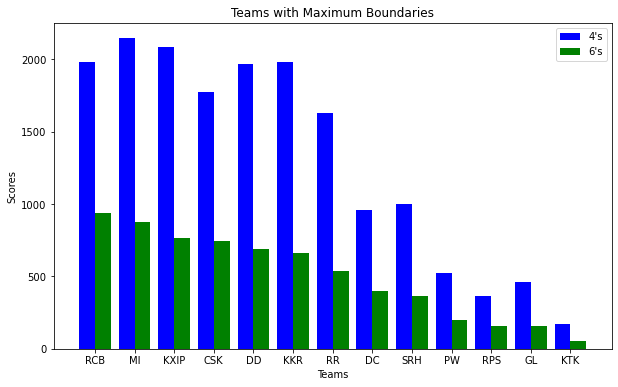

In [19]:
plt.subplots(figsize=(10,6))
X = MaxB["Teams"]
Y = MaxB["4's"]
Z = MaxB["6's"]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Y, 0.4, label = "4's", color="blue")
plt.bar(X_axis + 0.2, Z, 0.4, label = "6's", color="green")
  
plt.xticks(X_axis, X)
plt.xlabel("Teams")
plt.ylabel("Scores")
plt.title("Teams with Maximum Boundaries")
plt.legend()
plt.show()

In [20]:
#Observations:
`
#Kohli has scored the maximum 1's
#Dhoni has the maximum 2's . Those Strong Legs :p
#Gambhir has the maximum 4's.
#C Gayle has the maximum 6's and he leads by a big margin.

SyntaxError: invalid syntax (<ipython-input-20-3f9d985c47cd>, line 2)

In [21]:
#Players who scored the most number of runs
top_scores = IPLdf.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scores = top_scores.sort_values(by= 'batsman_runs',ascending= False)
top_scores.head(10)
#there are many RCB players on the top scores list. Looks like RCB is a very formidable batting side.

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


In [22]:
#Similarly sorting teams that scored the most number of runs.
high_scores=IPLdf.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores= high_scores.sort_values(by= 'total_runs',ascending= False)
high_scores = high_scores[high_scores['total_runs']>=200]
high_scores.head(10)

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
596,296,1,KXIP,RCB,232
981,486,1,KXIP,CSK,231
522,259,1,DD,KXIP,231
100,50,1,KXIP,MI,230
1170,580,1,RCB,SRH,227


<AxesSubplot:xlabel='batting_team', ylabel='count'>

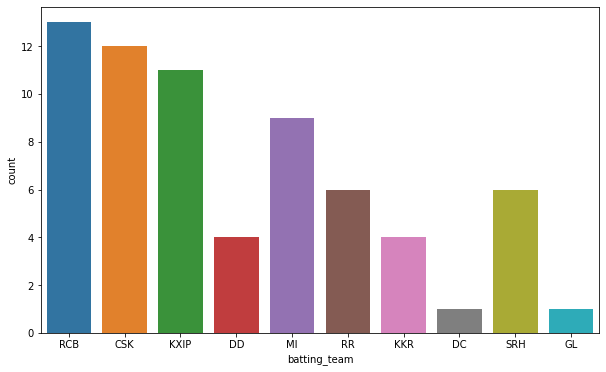

In [23]:
#The graph shows the number of times a team has scored above 200 runs.
plt.subplots(figsize=(10,6))
sns.countplot(high_scores['batting_team'])

<AxesSubplot:xlabel='bowling_team', ylabel='count'>

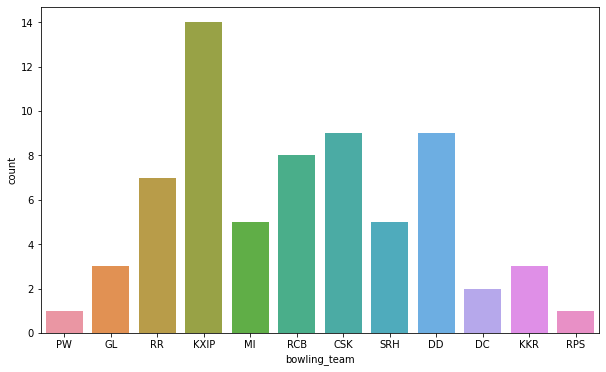

In [24]:
#The graph shows the number of times a bowling team has conceeded above 200 runs.
plt.subplots(figsize=(10,6))
sns.countplot(high_scores['bowling_team'])

In [25]:
#The high dataframe represents the number of times a team has scored above 200 runs against another team.
high=IPLdf.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high
#The number of 200+ runs are higher in the 1st innings than 2nd inningx. To understand it clearly, let's use boxplot.

count
inning batting_team bowling_team       
1      CSK          DD                1
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
                    RR                1
                    SRH               2
       DC           RR                1
       DD           KXIP              1
                    MI                1
                    RPS               1
       GL           DD                1
       KKR          DC                1
                    KXIP              1
                    RCB               1
       KXIP         CSK               2
                    MI                1
                    RCB               2
                    RR                1
       MI           CSK               1
                    DD                4
                    RCB               1
                    RR                1
       RCB          CSK               1
                    DD                1
                    GL                2
                    KXIP              3
                    MI                1
                    PW                1
                    RR                1
                    SRH               1
       RR           CSK               1
                    DD                1
                    KXIP              1
       SRH          KKR               1
                    KXIP              2
                    RCB               2
                    RR                1
2      CSK          KXIP              1
                    RCB               1
                    RR                1
       DD           GL                1
       KKR          KXIP              1
       KXIP         CSK               2
                    DD                1
                    KKR               1
                    SRH               1
       MI           CSK               1
                    KXIP              1
       RCB          KXIP              1
                    SRH               1
       RR           CSK               1
                    DC                1
                    MI                1

Text(0.5, 1.0, '1st Innings Scores')

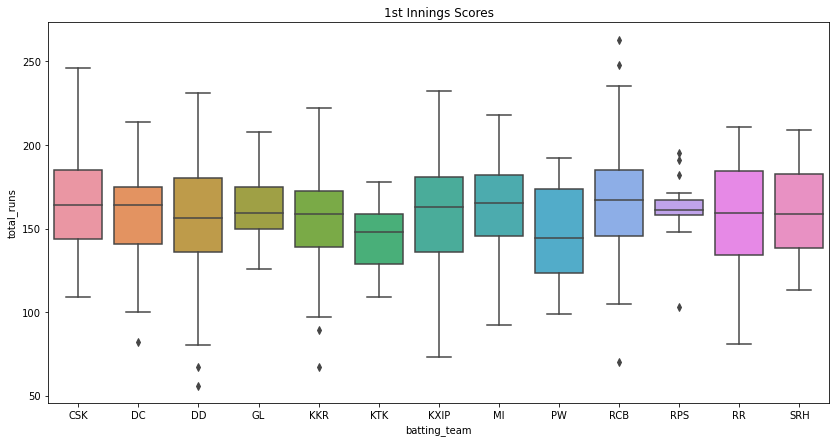

In [26]:
#Comparing bowling and batting teams according to the total runs scored by each
plt.subplots(figsize=(14,7))
Compare=IPLdf.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
Compare.drop('match_id',axis=1,inplace=True) #To avoid indexation while plotting boxplot

Compare=Compare.sort_values(by=['batting_team','total_runs'],ascending=True)

First_inning=Compare[Compare['inning']==1]

sns.boxplot(x='batting_team',y='total_runs',data=First_inning).set_title('1st Innings Scores')

Text(0.5, 1.0, '2nd Innings Scores')

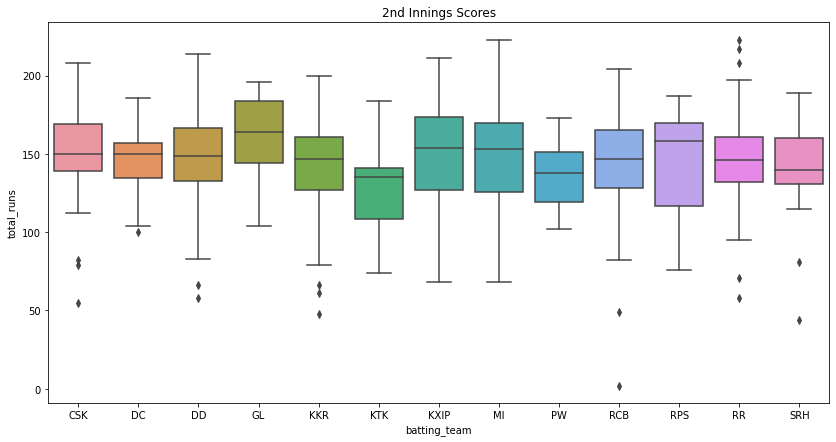

In [27]:
plt.subplots(figsize=(14,7))

Second_inning=Compare[Compare['inning']==2]

sns.boxplot(x='batting_team',y='total_runs',data=Second_inning).set_title('2nd Innings Scores')

In [28]:
IPLdf["dismissal_kind"].unique()
#no balls #wides #leg-bye

array([0, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [ ]:
#Using dismissal_kind to identify the behaviour of the bowlers
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"] 
#retired hurt, run out & obstructing the field does not relate to the bowlers behaviour.
Ballersbehav=IPLdf[IPLdf["dismissal_kind"].isin(dismissal_kinds)] #Subsetting to specific important balls
Ballersbehav['bowler'].value_counts()[:10].reset_index()

In [ ]:
plt.subplots(figsize=(10,6))
ax=Ballersbehav['bowler'].value_counts()[:10].plot.bar(width=0.7,color=sns.color_palette('magma'))

In [ ]:
#Total Number of overs delivered by each bowler
OversBowled=IPLdf.groupby(['bowler']).sum()
OversBowled['total balls']=IPLdf['bowler'].value_counts()
OversBowled['overs']=(OversBowled['total balls']//6) #6 Balls per over
A = OversBowled[OversBowled['overs']>400].sort_values(by='overs',ascending=False)['overs'].reset_index()
A.head(5)

In [ ]:
#runs per over
OversBowled['Rpo']=(OversBowled['total_runs']/(OversBowled['overs'])) 
OversBowled[(OversBowled['overs']>300)].sort_values('Rpo')[:10].Rpo.reset_index().T